In [2]:
# import all required lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors




In [4]:
df=pd.read_csv('/content/sample_data/product_quality.csv')

In [5]:
df.shape

(1000, 2)

In [6]:
df.head()

,Length_mm,Weight_g
0,100.99,246.88
1,99.72,247.22
2,101.30,246.81
3,103.05,255.95
4,99.53,257.10


In [7]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

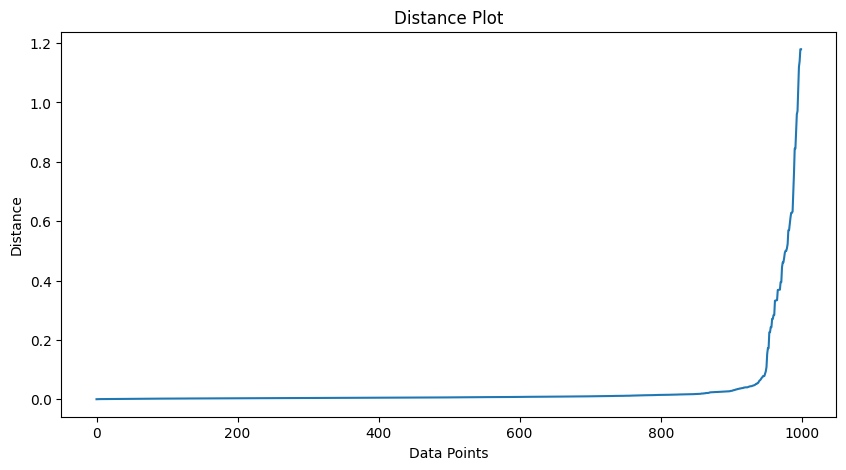

In [9]:
neighbors=NearestNeighbors(n_neighbors=10)
neighbors_fit=neighbors.fit(df_scaled)
distance,indices=neighbors_fit.kneighbors(df_scaled)
distance=np.sort(distance,axis=0)
distance=distance[:,1]
plt.figure(figsize=(10,5))
plt.plot(distance)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Distance Plot')
plt.show()

In [ ]:
dbscan=DBSCAN(eps=0.5,min_samples=10)
df

In [11]:
df['Cluster']=dbscan.fit_predict(df_scaled)

In [13]:
df

,Length_mm,Weight_g,Cluster
0,100.99,246.88,0
1,99.72,247.22,0
2,101.30,246.81,0
3,103.05,255.95,0
4,99.53,257.10,0
...,...,...,...
995,185.32,191.25,-1
996,178.23,278.68,-1
997,153.88,310.12,-1
998,129.34,546.35,-1


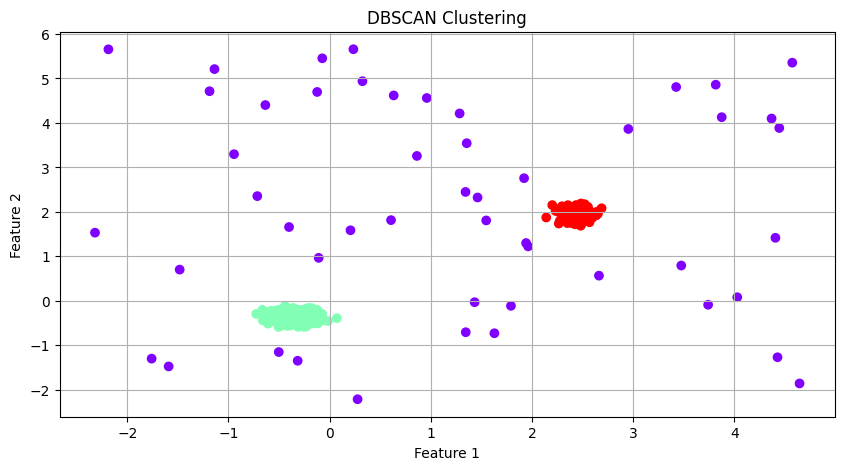

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(df_scaled[:,0],df_scaled[:,1],c=df['Cluster'],cmap='rainbow')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.grid()
plt.show()